# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading DataFrame

In [2]:
df=pd.read_csv('CardioGoodFitness.csv')
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


# Checking Data-types present in DataFrame

In [3]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

# Checking DataFrame Shape

In [5]:
df.shape

(180, 9)

In [7]:
# unique values in Product
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [8]:
# Describing the DataFrame
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
# checking the null values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
# checking correlation of DataFrame
corr=df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


# Data Visualization (Heatmap)

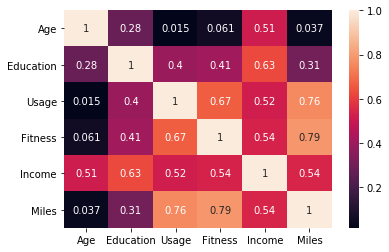

In [11]:
sns.heatmap(corr,annot=True)

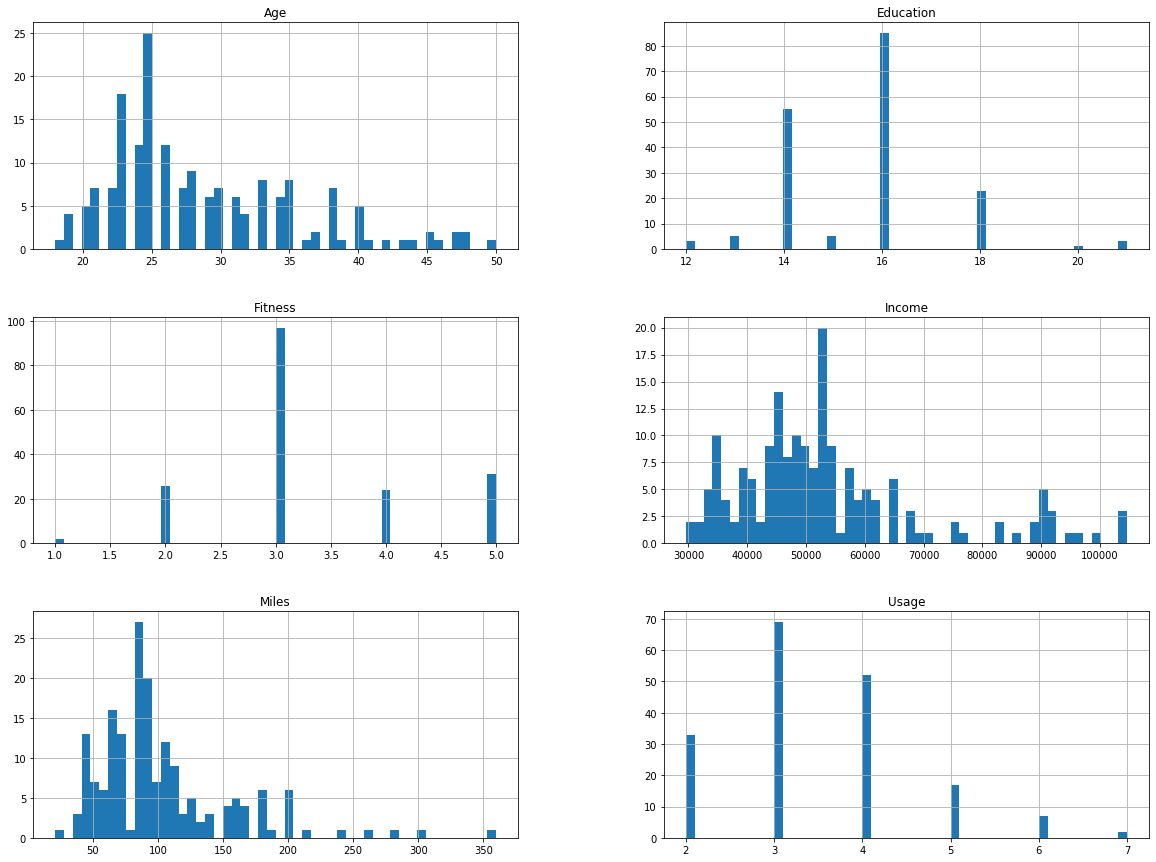

In [12]:
# Data Visualization of DataFrme
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
# checking unique values present in Education column
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [16]:
# changing data-type
df['Education']=df['Education'].astype('str')

In [17]:
# define 'x' and 'y'
x=df.drop(columns='Product')
y=df[['Product']]

In [18]:
# x first 5 rows
x.head()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,18,Male,14,Single,3,4,29562,112
1,19,Male,15,Single,2,3,31836,75
2,19,Female,14,Partnered,4,3,30699,66
3,19,Male,12,Single,3,3,32973,85
4,20,Male,13,Partnered,4,2,35247,47


In [19]:
# y first 5 rows
y.head()

,Product
0,TM195
1,TM195
2,TM195
3,TM195
4,TM195


In [20]:
# label encoding for categorical columns present in 'x' and 'y'
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
features=['Gender','MaritalStatus','Education']
for feature in features:
    x[feature] = label.fit_transform(x[feature])
y['Product'] = label.fit_transform(y['Product'])

C:\Users\Asad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
x.head()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,18,1,2,1,3,4,29562,112
1,19,1,3,1,2,3,31836,75
2,19,0,2,0,4,3,30699,66
3,19,1,0,1,3,3,32973,85
4,20,1,1,0,4,2,35247,47


In [22]:
y.head()

,Product
0,0
1,0
2,0
3,0
4,0


In [23]:
y.Product.unique()

array([0, 1, 2], dtype=int64)

# Data Preprocessing

In [27]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [28]:
x_scaled[:5]

array([[0.        , 1.        , 0.28571429, 1.        , 0.2       ,
        0.75      , 0.        , 0.26843658],
       [0.03125   , 1.        , 0.42857143, 1.        , 0.        ,
        0.5       , 0.03031232, 0.15929204],
       [0.03125   , 0.        , 0.28571429, 0.        , 0.4       ,
        0.5       , 0.01515616, 0.13274336],
       [0.03125   , 1.        , 0.        , 1.        , 0.2       ,
        0.5       , 0.04546848, 0.18879056],
       [0.0625    , 1.        , 0.14285714, 0.        , 0.4       ,
        0.25      , 0.0757808 , 0.07669617]])

In [ ]:
# Creating Train and Test variables for 'x_scaled' and 'y'

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3,random_state=1)

#printing the shapes
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (126, 8)
Shape of X_test: (54, 8)
Shape of y_train: (126, 1)
Shape of y_test: (54, 1)


# Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr=Pipeline([('lr_classifier',LogisticRegression())])
knn=Pipeline([('knn_classifier',KNeighborsClassifier())])
rf=Pipeline([('rf_classifier',RandomForestClassifier())])

#making the list of pipeline
pipelines=[lr,knn,rf]

best_accuracy=0.0
best_pipeline=""

#Dictionary of pipeline and classifier types for ease of reference
pipe_dict={0:'Logistic Regression',1:'K-NN',2:'RandomForest'}

#Fit the pipeline
for pipe in pipelines:
    pipe.fit(X_train,y_train)

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Asad\Anaco

In [43]:
#checking which model perform best
for i, model in enumerate(pipelines):
    print('{} Test Accuray:{}'.format(pipe_dict[i],model.score(X_train,y_train)))

Logistic Regression Test Accuray:0.6349206349206349
K-NN Test Accuray:0.753968253968254
RandomForest Test Accuray:0.9841269841269841


# Random Forest Classifier

In [31]:
clf=RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
pred[:5]

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([0, 1, 0, 2, 1])

In [34]:
#checking accuracy of the classifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#cross validation score
score=cross_val_score(clf,X_train,y_train,cv=4)
print('Score=',score)
print('Score mean=',score.mean())

#cross validation prediction
predict=cross_val_predict(clf,X_train,y_train,cv=4)
print('Predicts=',predict[0:5])

#mean squared error
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error=',mse)

#accuracy score
print('Accuracy Score=',accuracy_score(y_test,pred))

#classification report
print('\nClassification Report:\n',classification_report(y_test,pred))

Score= [0.60606061 0.65625    0.64516129 0.53333333]
Score mean= 0.6102013074291299
Predicts= [0 0 1 0 1]
Mean Squared Error= 0.35185185185185186
Accuracy Score= 0.6481481481481481

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68        25
           1       0.50      0.26      0.34        19
           2       1.00      1.00      1.00        10

    accuracy                           0.65        54
   macro avg       0.70      0.69      0.67        54
weighted avg       0.63      0.65      0.62        54



C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

# RandomSearchCV for Hyperparameter Tunning

In [35]:
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid  
param_dist = {'n_estimators':[10,20,40,60,80,100],
              'max_features': ['sqrt', 'log2','auto']}  

# Instantiating RandomizedSearchCV object 
random_search = RandomizedSearchCV(clf, param_dist, cv = 4,scoring='accuracy',error_score=0) 
  
random_search.fit(X_train,y_train) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(random_search.best_params_)) 
print("Best score is {}".format(random_search.best_score_))

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

Tuned Parameters: {'n_estimators': 100, 'max_features': 'log2'}
Best score is 0.6825396825396826


C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector 

In [36]:
# checking the best Estimator 
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

C:\Users\Asad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


1.0

In [51]:
pred=clf.predict(X_test)
pred[:5]

array([0, 1, 1, 2, 1])

In [52]:
#accuracy score
print('Accuracy Score=',accuracy_score(y_test,pred))

Accuracy Score= 0.7592592592592593


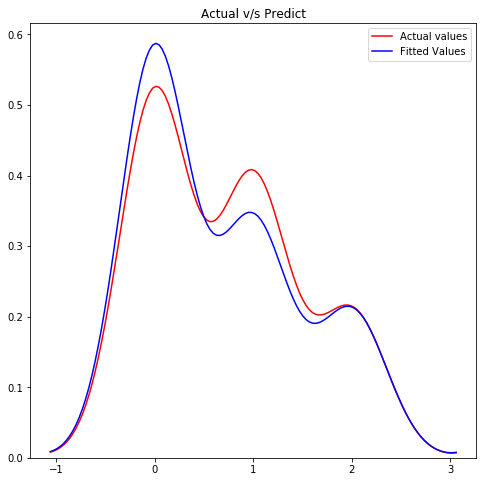

In [53]:
# ploting a graph for Prediction Values against Actual Values
plt.figure(figsize=(8,8))
plt.title('Actual v/s Predict')
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred,hist=False,color='b',label='Fitted Values',ax=ax1)